<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Sbu-logo.svg/1200px-Sbu-logo.svg.png" alt="keras" width="150" height="150">

<h1 align=center><font size = 7>NLP Summer School</font></h1>
<h1 align=center><font size = 6>NLP Research Lab</font></h1>
<h1 align=center><font size = 5>Shahid Beheshti University</font></h1>
<h1 align=center><font size = 4> July 2022 </font></h1>

# **Getting Ready!**

## Installation

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.bin.gz
!gunzip /content/cc.fa.300.bin.gz
!pip install fasttext

--2022-07-19 19:40:05--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4502524724 (4.2G) [application/octet-stream]
Saving to: ‘cc.fa.300.bin.gz’

cc.fa.300.bin.gz    100%[===================>]   4.19G  12.4MB/s    in 3m 22s  

2022-07-19 19:43:27 (21.3 MB/s) - ‘cc.fa.300.bin.gz’ saved [4502524724/4502524724]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 4.0 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3165341 sha256=c510ce19a51cb04ec8be11ce0945ad1aae7151139d9b078c7009c9893084b15b
  Stored in directory: /roo

In [ ]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 6.9 MB/s 
     |████████████████████████████████| 1.4 MB 44.7 MB/s 
     |████████████████████████████████| 233 kB 54.0 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394486 sha256=ba58394a19ee7f09ad498f24a45ab81daccdb920b53c010fcb2147bc19e22056
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154724 sha256=f08565e70a1f58c9d6af48d049bc92f0cc645259212e53af44574253d72b7741
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [ ]:
!pip install -q clean-text[gpl]

     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 175 kB 39.1 MB/s 
     |████████████████████████████████| 235 kB 46.7 MB/s 


In [ ]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/NLP Lab & Thesis/TA/کارآموزی تابستان 1401/

/content/drive/My Drive/NLP Lab & Thesis/TA/کارآموزی تابستان 1401


In [ ]:
import re
import hazm
# import numpy
import random
import fasttext
import numpy as np
import pandas as pd
import keras.backend as K
from cleantext import clean
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.layers import Dropout, Dense, LSTM, Bidirectional

# **Processing The Data**

## Reading Data

In [ ]:
xls = pd.ExcelFile('Labeled-Sentences.xlsx')
df1 = pd.read_excel(xls, 'Sheet1')
data_sheet1 = df1[['review', 'label']]
df2 = pd.read_excel(xls, 'Sheet2')
data_sheet2 = df2[['review', 'label']]
Data = pd.concat([data_sheet1, data_sheet2], axis=0, join='inner')
display(Data)

,review,label
0,سلام من یک ماه پیش در هتل شمس قشم بودم واقعا ه...,2
1,سلام بنده با همراه خانوادم چهار روز در این هتل...,2
2,ما از تاریخ ۵اسفند ۹۶تا۸اسفند ۹۶ در این هتل اق...,2
3,من 2روز در اين هتل به همراه همسرم اقامت داشتم ...,2
4,سفر بسیار خوبی بود هتل بسیار زیبا و قشنگی بود ...,2
...,...,...
698,هتل بسيار تميز و داراي استانداردهاي روز دنيا,2
699,طراحي مدرن و عالي,2
700,پرسنل آموزش ديده جوان و تحصيلكرده,2
701,اتاقهاي فوق العاده تميز,2


## Handling The Missing Values

In [ ]:
# print missing values information
print('missing values stats')
print(Data.isnull().sum(), '\n')

missing values stats
review    1
label     0
dtype: int64 



In [ ]:
# Deleting the rows with missing values
Data = Data.dropna(how='any',axis=0) 

In [ ]:
# print missing values information
print('missing values stats')
print(Data.isnull().sum(), '\n')

missing values stats
review    0
label     0
dtype: int64 



## Processing The Sentences for their meaningfulness

In [ ]:
# calculate the length of comments based on their words
Data['review_len_by_words'] = Data['review'].apply(lambda t: len(hazm.word_tokenize(t)))
min_max_len = Data["review_len_by_words"].min(), Data["review_len_by_words"].max()
print(f'Min: {min_max_len[0]} \tMax: {min_max_len[1]}')

Min: 2 	Max: 1199


**Plotting The Distribution of Word Counts Within Reviews**

In [ ]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=Data['review_len_by_words']))

fig.update_layout(
    title_text='Distribution of word counts within comments',
    xaxis_title_text='Word Count',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.2)

fig.show()

In [ ]:
def data_gl_than(Data, less_than=100.0, greater_than=0.0, col='review_len_by_words'):
    data_length = Data[col].values
    data_glt = sum([1 for length in data_length if greater_than < length <= less_than])
    data_glt_rate = (data_glt / len(data_length)) * 100
    print(f'Texts with word length of greater than {greater_than} and less than {less_than} includes {data_glt_rate:.2f}% of the whole!')
    print()

data_gl_than(Data, 256, 3)

Texts with word length of greater than 3 and less than 256 includes 96.08% of the whole!



In [ ]:
minlim, maxlim = 3, 256

In [ ]:
# remove comments with the length of fewer than three words
Data['review_len_by_words'] = Data['review_len_by_words'].apply(lambda len_t: len_t if minlim < len_t <= maxlim else None)
Data = Data.dropna(subset=['review_len_by_words'])
Data = Data.reset_index(drop=True)

**Plotting The Distribution of Word Counts Within Reviews**

In [ ]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=Data['review_len_by_words']))

fig.update_layout(
    title_text='Distribution of word counts within comments',
    xaxis_title_text='Word Count',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.2)

fig.show()

## Preprocessing - Cleaning The Text

In [ ]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

def cleaning(text):
    text = text.strip()
    
    # regular cleaning
    text = clean(text,
        fix_unicode=True,
        to_ascii=False,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=False,
        no_digits=False,
        no_currency_symbols=True,
        no_punct=False,
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="0",
        replace_with_currency_symbol="")

    # cleaning htmls
    text = cleanhtml(text)
    
    # normalizing
    normalizer = hazm.Normalizer()
    text = normalizer.normalize(text)
    
    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        # u"\u200c"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)
    
    text = wierd_pattern.sub(r'', text)
    
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    
    return text

In [ ]:
# cleaning comments
Data['cleaned_review'] = Data['review'].apply(cleaning)

In [ ]:
# calculate the length of comments based on their words
Data['cleaned_review_len_by_words'] = Data['cleaned_review'].apply(lambda t: len(hazm.word_tokenize(t)))

# remove comments with the length of fewer than three words
Data['cleaned_review_len_by_words'] = Data['cleaned_review_len_by_words'].apply(lambda len_t: len_t if minlim < len_t <= maxlim else len_t)
Data = Data.dropna(subset=['cleaned_review_len_by_words'])
Data = Data.reset_index(drop=True)

Data.head()

,review,label,review_len_by_words,cleaned_review,cleaned_review_len_by_words
0,سلام من یک ماه پیش در هتل شمس قشم بودم واقعا ه...,2,58.0,سلام من یک ماه پیش در هتل شمس قشم بودم واقعا ه...,54
1,سلام بنده با همراه خانوادم چهار روز در این هتل...,2,63.0,سلام بنده با همراه خانوادم چهار روز در این هتل...,63
2,ما از تاریخ ۵اسفند ۹۶تا۸اسفند ۹۶ در این هتل اق...,2,51.0,ما از تاریخ ۵اسفند ۹۶تا۸اسفند ۹۶ در این هتل اق...,51
3,من 2روز در اين هتل به همراه همسرم اقامت داشتم ...,2,24.0,من ۲روز در این هتل به همراه همسرم اقامت داشتم ...,24
4,سفر بسیار خوبی بود هتل بسیار زیبا و قشنگی بود ...,2,23.0,سفر بسیار خوبی بود هتل بسیار زیبا و قشنگی بود ...,23


In [ ]:
Data = Data[['cleaned_review', 'label']]
Data.columns = ['review', 'label']
Data.head()

,review,label
0,سلام من یک ماه پیش در هتل شمس قشم بودم واقعا ه...,2
1,سلام بنده با همراه خانوادم چهار روز در این هتل...,2
2,ما از تاریخ ۵اسفند ۹۶تا۸اسفند ۹۶ در این هتل اق...,2
3,من ۲روز در این هتل به همراه همسرم اقامت داشتم ...,2
4,سفر بسیار خوبی بود هتل بسیار زیبا و قشنگی بود ...,2


## Plotting The Frequency of The Labels

In [ ]:
unique_rates = list(sorted(Data['label'].unique()))
print(f'We have #{len(unique_rates)}: {unique_rates}')

We have #3: [0, 1, 2]


In [ ]:
fig = go.Figure()

groupby_rate = Data.groupby('label')['label'].count()

fig.add_trace(go.Bar(
    x=list(sorted(groupby_rate.index)),
    y=groupby_rate.tolist(),
    text=groupby_rate.tolist(),
    textposition='auto'))

fig.update_layout(
    title_text='Distribution of rate within comments',
    xaxis_title_text='Label',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.2)

fig.show()

## Data Augmentation - Making The Labels Even in Counts

In [ ]:
# increasing the number of sentences with the label equals to 0
new_DataFrame_Zeros = []
c = 0
while len(new_DataFrame_Zeros)<901:
  new_DataFrame_p = []
  if Data['label'][c] == 0:
    temp_data = (Data['review'][c]).split()
    random.shuffle(temp_data)
    temp_data_2 =' '.join(temp_data)
    new_DataFrame_p.append(temp_data_2)
    new_DataFrame_p.append(Data['label'][c])
    new_DataFrame_Zeros.append(new_DataFrame_p)
  c+=1
  if c >= 1568:
    c = 0

In [ ]:
# increasing the number of sentences with the label equals to 1
new_DataFrame_Ones = []
c = 0
while len(new_DataFrame_Ones)<990:
  new_DataFrame_p = []
  if Data['label'][c] == 1:
    temp_data = (Data['review'][c]).split()
    random.shuffle(temp_data)
    temp_data_2 =' '.join(temp_data)
    new_DataFrame_p.append(temp_data_2)
    new_DataFrame_p.append(Data['label'][c])
    new_DataFrame_Ones.append(new_DataFrame_p)
  c+=1
  if c >= 1568:
    c = 0

In [ ]:
df_Zero = pd.DataFrame(new_DataFrame_Zeros, columns=['review','label'])

In [ ]:
df_Ones = pd.DataFrame(new_DataFrame_Ones, columns=['review','label'])

In [ ]:
# adding the new data to the previous ones
Data = pd.concat([Data, df_Zero, df_Ones], axis=0, join='inner')
display(Data)

,review,label
0,سلام من یک ماه پیش در هتل شمس قشم بودم واقعا ه...,2
1,سلام بنده با همراه خانوادم چهار روز در این هتل...,2
2,ما از تاریخ ۵اسفند ۹۶تا۸اسفند ۹۶ در این هتل اق...,2
3,من ۲روز در این هتل به همراه همسرم اقامت داشتم ...,2
4,سفر بسیار خوبی بود هتل بسیار زیبا و قشنگی بود ...,2
...,...,...
985,هتل که هتل که رو و فاصله مسواک بود. خوب هم نبو...,1
986,ما گرفته مراکز مخصوصا سوییت‌ها بزرگ‌بود وسایلت...,1
987,ء معمولی کارکنان اما اتاق نمیدونم یا بخاطر خوب...,1
988,مارینا نسبتا ایرادات بهترین اتاق‌های هتل از دو...,1


## Frequency of The Labels After Augmentation

In [ ]:
unique_rates = list(sorted(Data['label'].unique()))
print(f'We have #{len(unique_rates)}: {unique_rates}')

We have #3: [0, 1, 2]


In [ ]:
fig = go.Figure()

groupby_rate = Data.groupby('label')['label'].count()

fig.add_trace(go.Bar(
    x=list(sorted(groupby_rate.index)),
    y=groupby_rate.tolist(),
    text=groupby_rate.tolist(),
    textposition='auto'))

fig.update_layout(
    title_text='Distribution of rate within comments',
    xaxis_title_text='Label',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.2)

fig.show()

## Shuffling The Dataset

In [ ]:
Data.head()

,review,label
0,سلام من یک ماه پیش در هتل شمس قشم بودم واقعا ه...,2
1,سلام بنده با همراه خانوادم چهار روز در این هتل...,2
2,ما از تاریخ ۵اسفند ۹۶تا۸اسفند ۹۶ در این هتل اق...,2
3,من ۲روز در این هتل به همراه همسرم اقامت داشتم ...,2
4,سفر بسیار خوبی بود هتل بسیار زیبا و قشنگی بود ...,2


In [ ]:
Data = Data.sample(frac=1).reset_index(drop=True)

In [ ]:
Data.head()

,review,label
0,۵ حد ستاره در نیست. ولی,0
1,سفر بسیار خوبی بود هتل بسیار زیبا و قشنگی بود ...,2
2,"باسلام به دوستان عزیز ,هتل مارینا از هر لحاظ ع...",2
3,باسلام بنده برای اولین بار چند روز پیش اقامت د...,2
4,پرسنل عالی و وجود مواد با داشتیم بود از چها کو...,0


## Normalizing The Sentences

In [ ]:
sentences = Data['review'].values.tolist()
labels = Data['label'].values.tolist()

In [ ]:
for i in range(0,len(sentences)):
    _normalizer = hazm.Normalizer()
    sentences[i]=_normalizer.normalize(str(sentences[i]))

## Train & Test Split + Embedding

In [ ]:
# Building FastText Model
%time
model = fasttext.load_model("/content/cc.fa.300.bin")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


In [ ]:
vector_size = 300 
max_no_tokens = 20 
train_size = int(0.8*(len(sentences)))
test_size = int(0.2*(len(sentences)))
#print(train_size,test_size)
indexes = set(np.random.choice(len(sentences), train_size + test_size, replace=False))

x_train = np.zeros((train_size, max_no_tokens, vector_size), dtype=K.floatx())
y_train = np.zeros((train_size, 2), dtype=np.int32)

x_test = np.zeros((test_size, max_no_tokens, vector_size), dtype=K.floatx())
y_test = np.zeros((test_size, 2), dtype=np.int32)

In [ ]:
for i, index in enumerate(indexes):
  text_words = hazm.word_tokenize(sentences[index])
  for t in range(0,len(text_words)):
    if t >= max_no_tokens:
      break
    
    if text_words[t] not in model.words:
      continue
    if i < train_size:
      x_train[i, t, :] = model.get_word_vector(text_words[t])
      
    else:
      x_test[i - train_size, t, :] = model.get_word_vector(text_words[t])

  if i < train_size:
    y_train[i, :] = [1.0, 0.0] if labels[index] == 2 else [0.0, 1.0]
  else:
    y_test[i - train_size, :] = [1.0, 0.0] if labels[index] == 2 else [0.0, 1.0]
    
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((2767, 20, 300), (691, 20, 300), (2767, 2), (691, 2))

In [ ]:
x_train[0][0][0]

0.1569983

# **Training The Model**

In [ ]:
batch_size = 128
no_epochs = 50

## LSTM

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.3, input_shape=(max_no_tokens, vector_size)))
LSTM_model.add(Dense(64, activation='sigmoid'))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(2, activation='softmax'))

LSTM_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

LSTM_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 32)                42624     
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 2)                 130       
                                                                 
Total params: 44,866
Trainable params: 44,866
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = LSTM_model.fit(x_train[:2000], y_train[:2000], batch_size=batch_size, shuffle=True, epochs=no_epochs, validation_data=(x_train[2000:], y_train[2000:]))

Epoch 1/50
16/16 [==============================] - 5s 116ms/step - loss: 0.6737 - accuracy: 0.6000 - val_loss: 0.6420 - val_accuracy: 0.6610
Epoch 2/50
16/16 [==============================] - 1s 89ms/step - loss: 0.6741 - accuracy: 0.6185 - val_loss: 0.6383 - val_accuracy: 0.6610
Epoch 3/50
16/16 [==============================] - 1s 87ms/step - loss: 0.6645 - accuracy: 0.6345 - val_loss: 0.6368 - val_accuracy: 0.6610
Epoch 4/50
16/16 [==============================] - 1s 84ms/step - loss: 0.6651 - accuracy: 0.6345 - val_loss: 0.6360 - val_accuracy: 0.6610
Epoch 5/50
16/16 [==============================] - 1s 91ms/step - loss: 0.6602 - accuracy: 0.6435 - val_loss: 0.6351 - val_accuracy: 0.6610
Epoch 6/50
16/16 [==============================] - 1s 86ms/step - loss: 0.6538 - accuracy: 0.6540 - val_loss: 0.6340 - val_accuracy: 0.6610
Epoch 7/50
16/16 [==============================] - 1s 86ms/step - loss: 0.6586 - accuracy: 0.6440 - val_loss: 0.6321 - val_accuracy: 0.6610
Epoch 8/50
1

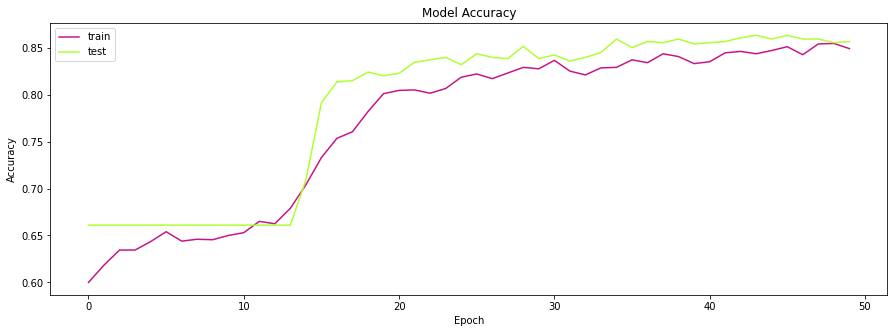

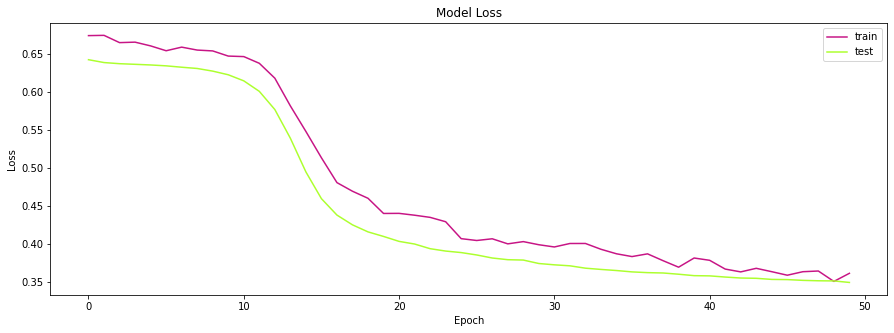

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'], color='mediumvioletred')
plt.plot(history.history['val_accuracy'], color='greenyellow')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], color='mediumvioletred')
plt.plot(history.history['val_loss'], color='greenyellow')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
LSTM_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)

22/22 [==============================] - 0s 7ms/step - loss: 0.3547 - accuracy: 0.8466


[0.35473987460136414, 0.8465991020202637]

In [ ]:
LSTM_model.save('LSTM1.h5')

## Stacked LSTM - 2 Stack

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.3, input_shape=(max_no_tokens, vector_size)))
LSTM_model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.3))

LSTM_model.add(Dense(64, activation='sigmoid'))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(2, activation='softmax'))

LSTM_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

LSTM_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 20, 32)            42624     
                                                                 
 lstm_9 (LSTM)               (None, 32)                8320      
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 2)                 130       
                                                                 
Total params: 53,186
Trainable params: 53,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = LSTM_model.fit(x_train[:2000], y_train[:2000], batch_size=batch_size, shuffle=True, epochs=no_epochs, validation_data=(x_train[2000:], y_train[2000:]))

Epoch 1/50
16/16 [==============================] - 10s 270ms/step - loss: 0.7437 - accuracy: 0.6670 - val_loss: 0.7262 - val_accuracy: 0.6610
Epoch 2/50
16/16 [==============================] - 4s 245ms/step - loss: 0.7301 - accuracy: 0.6645 - val_loss: 0.7053 - val_accuracy: 0.6610
Epoch 3/50
16/16 [==============================] - 4s 217ms/step - loss: 0.7157 - accuracy: 0.6655 - val_loss: 0.6868 - val_accuracy: 0.6610
Epoch 4/50
16/16 [==============================] - 3s 189ms/step - loss: 0.6989 - accuracy: 0.6620 - val_loss: 0.6686 - val_accuracy: 0.6610
Epoch 5/50
16/16 [==============================] - 3s 160ms/step - loss: 0.6910 - accuracy: 0.6585 - val_loss: 0.6540 - val_accuracy: 0.6610
Epoch 6/50
16/16 [==============================] - 2s 115ms/step - loss: 0.6614 - accuracy: 0.6645 - val_loss: 0.6438 - val_accuracy: 0.6610
Epoch 7/50
16/16 [==============================] - 2s 115ms/step - loss: 0.6691 - accuracy: 0.6540 - val_loss: 0.6366 - val_accuracy: 0.6610
Epoch

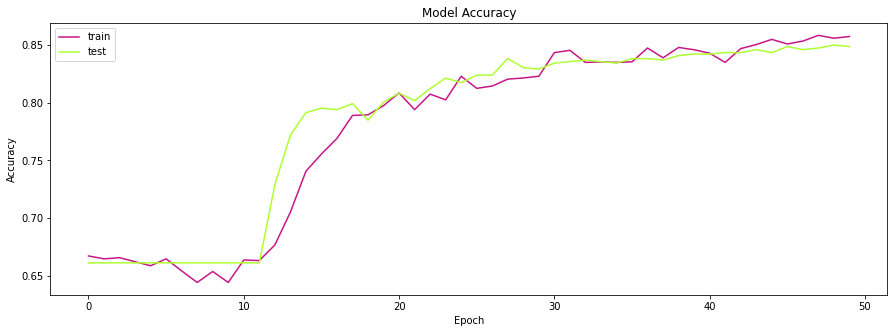

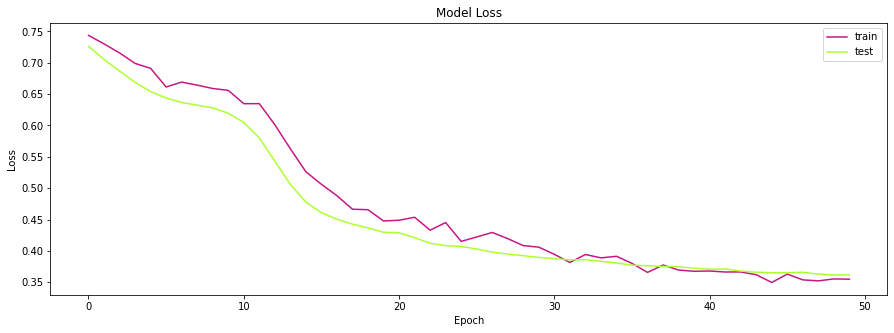

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'], color='mediumvioletred')
plt.plot(history.history['val_accuracy'], color='greenyellow')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], color='mediumvioletred')
plt.plot(history.history['val_loss'], color='greenyellow')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
LSTM_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)

22/22 [==============================] - 0s 10ms/step - loss: 0.3643 - accuracy: 0.8466


[0.3643379807472229, 0.8465991020202637]

In [ ]:
LSTM_model.save('LSTM2.h5')

## Stacked LSTM - 4 Stack

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.3, input_shape=(max_no_tokens, vector_size)))
LSTM_model.add(LSTM(32, dropout=0.2, return_sequences=True, recurrent_dropout=0.3))
LSTM_model.add(LSTM(32, dropout=0.2, return_sequences=True, recurrent_dropout=0.3))
LSTM_model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.3))

LSTM_model.add(Dense(64, activation='sigmoid'))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(2, activation='softmax'))

LSTM_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

LSTM_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 20, 32)            42624     
                                                                 
 lstm_11 (LSTM)              (None, 20, 32)            8320      
                                                                 
 lstm_12 (LSTM)              (None, 20, 32)            8320      
                                                                 
 lstm_13 (LSTM)              (None, 32)                8320      
                                                                 
 dense_16 (Dense)            (None, 64)                2112      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 2)                

In [ ]:
history = LSTM_model.fit(x_train[:2000], y_train[:2000], batch_size=batch_size, shuffle=True, epochs=no_epochs, validation_data=(x_train[2000:], y_train[2000:]))

Epoch 1/50
16/16 [==============================] - 20s 256ms/step - loss: 0.9176 - accuracy: 0.3400 - val_loss: 0.8760 - val_accuracy: 0.3390
Epoch 2/50
16/16 [==============================] - 3s 189ms/step - loss: 0.8750 - accuracy: 0.3515 - val_loss: 0.8352 - val_accuracy: 0.3390
Epoch 3/50
16/16 [==============================] - 3s 184ms/step - loss: 0.8371 - accuracy: 0.3720 - val_loss: 0.7919 - val_accuracy: 0.3390
Epoch 4/50
16/16 [==============================] - 4s 274ms/step - loss: 0.7912 - accuracy: 0.3925 - val_loss: 0.7419 - val_accuracy: 0.3390
Epoch 5/50
16/16 [==============================] - 5s 290ms/step - loss: 0.7290 - accuracy: 0.4735 - val_loss: 0.6879 - val_accuracy: 0.6349
Epoch 6/50
16/16 [==============================] - 4s 242ms/step - loss: 0.6859 - accuracy: 0.5650 - val_loss: 0.6499 - val_accuracy: 0.6610
Epoch 7/50
16/16 [==============================] - 3s 186ms/step - loss: 0.6638 - accuracy: 0.6205 - val_loss: 0.6393 - val_accuracy: 0.6610
Epoch

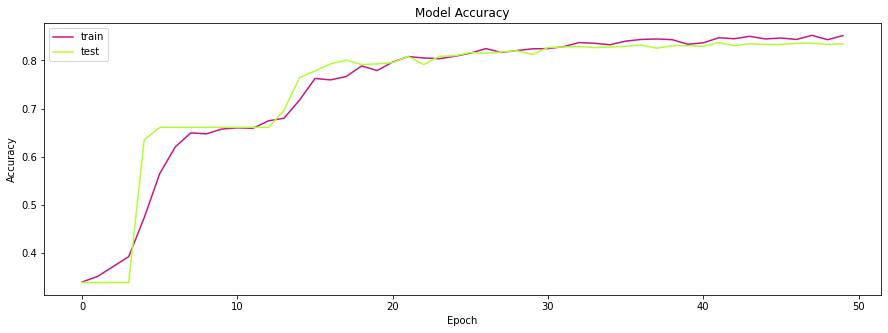

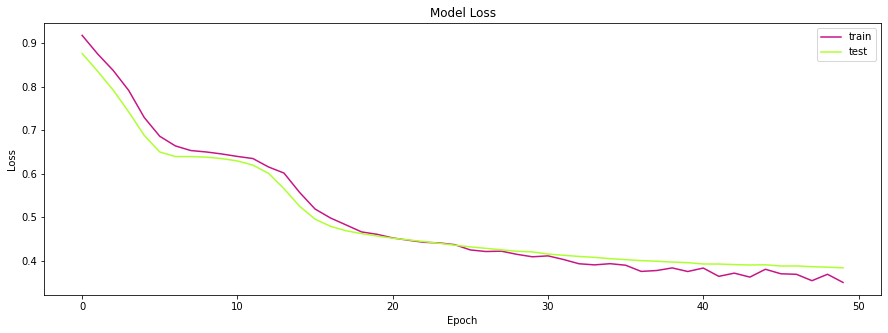

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'], color='mediumvioletred')
plt.plot(history.history['val_accuracy'], color='greenyellow')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], color='mediumvioletred')
plt.plot(history.history['val_loss'], color='greenyellow')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
LSTM_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)

22/22 [==============================] - 0s 14ms/step - loss: 0.3705 - accuracy: 0.8336


[0.3705112636089325, 0.8335745334625244]

In [ ]:
LSTM_model.save('LSTM4.h5')

## Stacked LSTM - 6 Stack

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.3, input_shape=(max_no_tokens, vector_size)))
LSTM_model.add(LSTM(32, dropout=0.2, return_sequences=True, recurrent_dropout=0.3))
LSTM_model.add(LSTM(32, dropout=0.2, return_sequences=True, recurrent_dropout=0.3))
LSTM_model.add(LSTM(32, dropout=0.2, return_sequences=True, recurrent_dropout=0.3))
LSTM_model.add(LSTM(32, dropout=0.2, return_sequences=True, recurrent_dropout=0.3))
LSTM_model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.3))

LSTM_model.add(Dense(64, activation='sigmoid'))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(2, activation='softmax'))

LSTM_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

LSTM_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 20, 32)            42624     
                                                                 
 lstm_15 (LSTM)              (None, 20, 32)            8320      
                                                                 
 lstm_16 (LSTM)              (None, 20, 32)            8320      
                                                                 
 lstm_17 (LSTM)              (None, 20, 32)            8320      
                                                                 
 lstm_18 (LSTM)              (None, 20, 32)            8320      
                                                                 
 lstm_19 (LSTM)              (None, 32)                8320      
                                                                 
 dense_18 (Dense)            (None, 64)               

In [ ]:
history = LSTM_model.fit(x_train[:2000], y_train[:2000], batch_size=batch_size, shuffle=True, epochs=no_epochs, validation_data=(x_train[2000:], y_train[2000:]))

Epoch 1/50
16/16 [==============================] - 25s 373ms/step - loss: 0.8560 - accuracy: 0.3740 - val_loss: 0.8077 - val_accuracy: 0.3390
Epoch 2/50
16/16 [==============================] - 4s 255ms/step - loss: 0.8208 - accuracy: 0.3980 - val_loss: 0.7750 - val_accuracy: 0.3390
Epoch 3/50
16/16 [==============================] - 4s 256ms/step - loss: 0.7859 - accuracy: 0.4305 - val_loss: 0.7426 - val_accuracy: 0.3390
Epoch 4/50
16/16 [==============================] - 4s 257ms/step - loss: 0.7590 - accuracy: 0.4440 - val_loss: 0.7063 - val_accuracy: 0.3390
Epoch 5/50
16/16 [==============================] - 4s 246ms/step - loss: 0.7265 - accuracy: 0.4985 - val_loss: 0.6614 - val_accuracy: 0.6610
Epoch 6/50
16/16 [==============================] - 4s 267ms/step - loss: 0.6700 - accuracy: 0.6040 - val_loss: 0.6400 - val_accuracy: 0.6610
Epoch 7/50
16/16 [==============================] - 4s 281ms/step - loss: 0.6635 - accuracy: 0.6460 - val_loss: 0.6425 - val_accuracy: 0.6610
Epoch

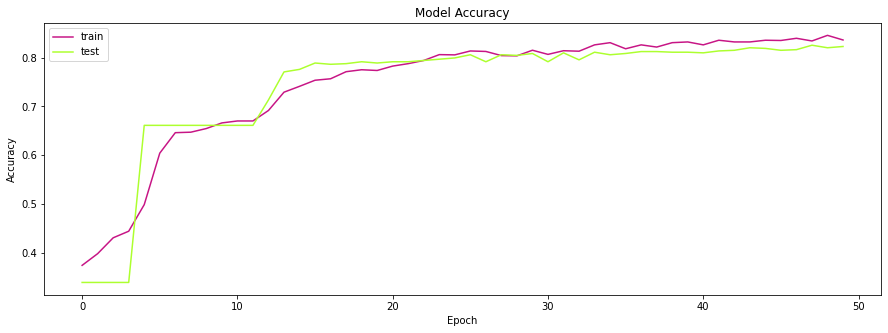

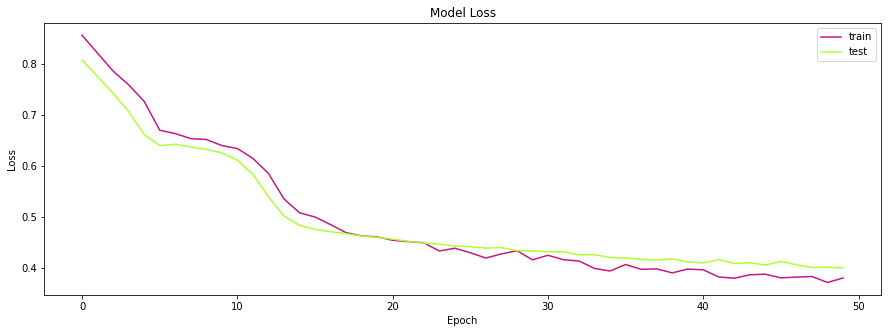

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'], color='mediumvioletred')
plt.plot(history.history['val_accuracy'], color='greenyellow')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], color='mediumvioletred')
plt.plot(history.history['val_loss'], color='greenyellow')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
LSTM_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)

22/22 [==============================] - 1s 22ms/step - loss: 0.3774 - accuracy: 0.8177


[0.377444863319397, 0.8176555633544922]

In [ ]:
LSTM_model.save('LSTM6.h5')

## BiLSTM

In [ ]:
BiLSTM_model = Sequential()
BiLSTM_model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.3), input_shape=(max_no_tokens, vector_size)))

BiLSTM_model.add(Dense(64, activation='sigmoid'))
BiLSTM_model.add(Dropout(0.2))
BiLSTM_model.add(Dense(2, activation='softmax'))

BiLSTM_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

BiLSTM_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               85248     
 l)                                                              
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 2)                 130       
                                                                 
Total params: 89,538
Trainable params: 89,538
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = BiLSTM_model.fit(x_train[:2000], y_train[:2000], batch_size=batch_size, shuffle=True, epochs=no_epochs, validation_data=(x_train[2000:], y_train[2000:]))

Epoch 1/50
16/16 [==============================] - 10s 218ms/step - loss: 0.9366 - accuracy: 0.3425 - val_loss: 0.8831 - val_accuracy: 0.3390
Epoch 2/50
16/16 [==============================] - 3s 159ms/step - loss: 0.8924 - accuracy: 0.3470 - val_loss: 0.8370 - val_accuracy: 0.3390
Epoch 3/50
16/16 [==============================] - 2s 154ms/step - loss: 0.8378 - accuracy: 0.3615 - val_loss: 0.7939 - val_accuracy: 0.3390
Epoch 4/50
16/16 [==============================] - 2s 150ms/step - loss: 0.7959 - accuracy: 0.3880 - val_loss: 0.7525 - val_accuracy: 0.3390
Epoch 5/50
16/16 [==============================] - 2s 149ms/step - loss: 0.7541 - accuracy: 0.4260 - val_loss: 0.7131 - val_accuracy: 0.3390
Epoch 6/50
16/16 [==============================] - 2s 151ms/step - loss: 0.7180 - accuracy: 0.4960 - val_loss: 0.6769 - val_accuracy: 0.6402
Epoch 7/50
16/16 [==============================] - 2s 148ms/step - loss: 0.6735 - accuracy: 0.5915 - val_loss: 0.6473 - val_accuracy: 0.6506
Epoch

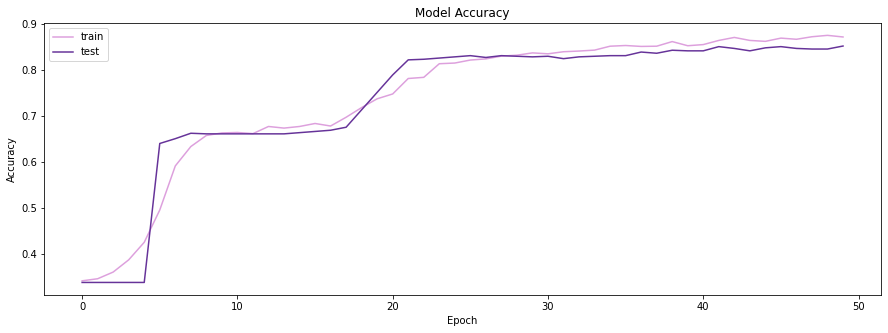

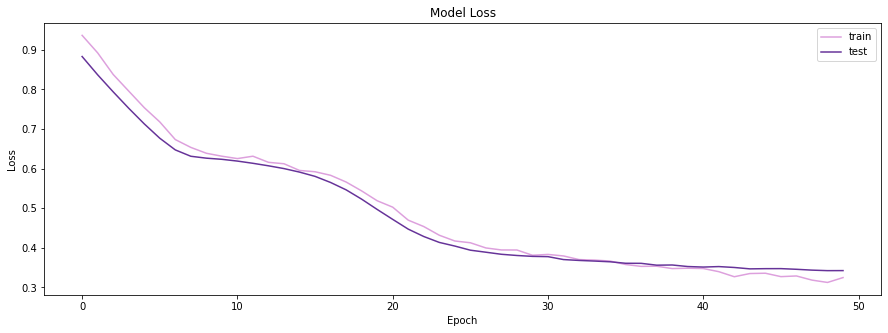

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'], color='plum')
plt.plot(history.history['val_accuracy'], color='rebeccapurple')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], color='plum')
plt.plot(history.history['val_loss'], color='rebeccapurple')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
BiLSTM_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)

22/22 [==============================] - 0s 14ms/step - loss: 0.3395 - accuracy: 0.8480


[0.3395017981529236, 0.8480463027954102]

In [ ]:
BiLSTM_model.save('BiLSTM.h5')

# **Testing The Model**

In [ ]:
BiLSTM = load_model('BiLSTM.h5')

In [ ]:
# Building FastText Model
%time
model = fasttext.load_model("/content/cc.fa.300.bin")

In [ ]:
def SentimentAnalysis(Sentence):
  _normalizer = hazm.Normalizer()
  normalized_text = _normalizer.normalize(Sentence)
  tokenized_text = hazm.word_tokenize(normalized_text)
  X = np.zeros((1,max_no_tokens,vector_size),dtype=K.floatx())
  for m in range(0,len(tokenized_text)):
    if m >= max_no_tokens:
      break
    if tokenized_text[m] not in model.words:
      continue
    X[0, m, :] = model.get_word_vector(tokenized_text[m])
  result = BiLSTM.predict(X)
  positive_percentage = str(int(result[0][0]*100))+"%"
  negative_percentage = str(int(result[0][1]*100))+"%"
  if (int(result[0][1]*100) > 50):
    print("The sentiment of this sentence is",negative_percentage, "negative &", positive_percentage,"positive!")     
  else:
    print("The sentiment of this sentence is",positive_percentage, "positive &", negative_percentage,"negative!")   

In [ ]:
def SentimentAnalysis(Sentence, vector_size = 300, max_no_tokens = 20):
  _normalizer = hazm.Normalizer()
  normalized_text = _normalizer.normalize(Sentence)
  tokenized_text = hazm.word_tokenize(normalized_text)
  X = np.zeros((1,max_no_tokens,vector_size),dtype=K.floatx())
  for m in range(0,len(tokenized_text)):
    if m >= max_no_tokens:
      break
    if tokenized_text[m] not in model.words:
      continue
    X[0, m, :] = model.get_word_vector(tokenized_text[m])
  result = BiLSTM.predict(X)
  positive_percentage = str(int(result[0][0]*100))+"%"
  negative_percentage = str(int(result[0][1]*100))+"%"
  if (int(result[0][1]*100) > 50):
    print("The sentiment of this sentence is",negative_percentage, "negative &", positive_percentage,"positive!")     
  else:
    print("The sentiment of this sentence is",positive_percentage, "positive &", negative_percentage,"negative!")  

In [ ]:
SentimentAnalysis("خیلی همه چیز کثیف بود و رفتار کارکنان واقعا بد بود.")

The sentiment of this sentence is 61% negative & 38% positive!


In [ ]:
SentimentAnalysis("فوق العاده بود، دلم می خواد بازم برم")

The sentiment of this sentence is 84% positive & 15% negative!


In [ ]:
SentimentAnalysis("نه خوب بود و نه بد")

The sentiment of this sentence is 93% negative & 6% positive!


In [ ]:
SentimentAnalysis("شاید برم باز")

The sentiment of this sentence is 52% positive & 47% negative!


In [ ]:
SentimentAnalysis("عالی بود، حتما میرم باز")

The sentiment of this sentence is 81% positive & 18% negative!


In [ ]:
SentimentAnalysis("نزدیک حرمه")

The sentiment of this sentence is 71% positive & 28% negative!


In [ ]:
SentimentAnalysis("نزدیک پاساژه")

The sentiment of this sentence is 70% positive & 29% negative!


In [ ]:
SentimentAnalysis("نزدیک دریاست")

The sentiment of this sentence is 70% positive & 29% negative!


In [ ]:
SentimentAnalysis("به دریا نزدیک نبود")

The sentiment of this sentence is 54% positive & 45% negative!


In [ ]:
SentimentAnalysis("به دریا نزدیک نبود و این یه ویژگی خوب به حساب نمیاد")

The sentiment of this sentence is 85% negative & 14% positive!
